# Introduction

In mathematical notion, if $\hat y$ is the predicted value

$$\hat y(w,x)=w_0+w_1x_1+...+w_px_p$$

Across the module, we designate the vector $w=(w_1,...,w_p)$ as **coef_** and $w_0$ as **intercept_**

# 1.1.1.  Ordinary Least Squares

**Linear Regression** fits a linear model with coefficients $w=(w_1,...,w_p)$ to minimize the residual sum of squares. Mathematically,

$$\min_w \left \lVert Xw-y \right \rVert_2^2$$

### Example

In [119]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

In [120]:
# Load the diabetes dataset
diabetes=datasets.load_diabetes()

In [121]:
# Use only one feature
diabetes_X = diabetes.data[:,np.newaxis,2]

In [122]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [123]:
# Split the labels into training/testing sets
diabetes_Y_train = diabetes.target[:-20]
diabetes_Y_test = diabetes.target[-20:]

In [124]:
# Create linear regression object
regr=linear_model.LinearRegression()

In [125]:
# Train the model using train set
regr.fit(diabetes_X_train , diabetes_Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [126]:
# The coefficients
print('Coefficients:')
print regr.coef_
# The mean square error
print ('Residual sum of squares: %.2f'
     % np.mean((regr.predict(diabetes_X_test)-diabetes_Y_test)**2))

Coefficients:
[ 938.23786125]
Residual sum of squares: 2548.07


In [127]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' %regr.score(diabetes_X_test, diabetes_Y_test))

Variance score: 0.47


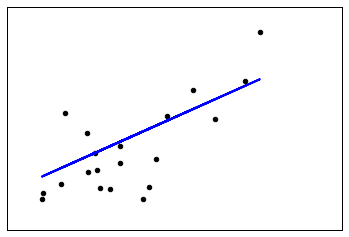

In [128]:
# Plot outputs
plt.scatter(diabetes_X_test , diabetes_Y_test , color='black')
plt.plot(diabetes_X_test , regr.predict(diabetes_X_test) , color='blue' , linewidth=2)

plt.xticks(())
plt.yticks(())
plt.show()

### Exercise

In [129]:
# Load the diabetes dataset
diabete=datasets.load_diabetes()

In [130]:
# Pick up only one feature
diabete_X = diabete.data[: , np.newaxis , 0]

In [131]:
# Split features into the training/testing set
diabete_X_train=diabete_X[:-20]
diabete_X_test=diabete_X[-20:]

In [132]:
# Split labels into the training/testing label set
diabete_Y_train=diabete.target[:-20]
diabete_Y_test=diabete.target[-20:]

In [133]:
# Train the linear regression model
lrm = linear_model.LinearRegression()
lrm.fit(diabete_X_train , diabete_Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [134]:
# The coefficients and square error
print ('Coefficients : %0.2f' %lrm.coef_)
print ('Residual sum of squares: %0.2f' 
       %np.mean((lrm.predict(diabete_X_test)-diabete_Y_test)**2))

Coefficients : 306.73
Residual sum of squares: 5472.26


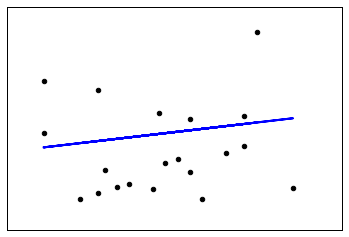

In [135]:
# Plot the diagram
plt.scatter(diabete_X_test , diabete_Y_test , color='black')
plt.plot(diabete_X_test , lrm.predict(diabete_X_test) , color='blue' , linewidth=2)

plt.xticks(())
plt.yticks(())
plt.show()

# 1.1.2. Ridge Regression

**Ridge** Regression addresses some of the problems of Ordinary Least Square by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

$$\min_w \left\lVert Xw-Y \right\lVert_2^2 + \alpha \left\lVert w \right\lVert_2^2$$

Note that $\alpha>0$ is a complexity parameter that controls the amount of shrinkage : the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

The implement is like the **LinearRegression**

## Setting the regularization parameter : generalized Cross-Validation

**RidgeCV** implements ridge regression with built-in cross-validation of the alpha parameter.

## Example 

We use a example that classifies text documents using sparse features to implement the function. See details in the *Classification of text documents using sparse features*.ipython

# 1.1.3. Lasso

The **Lasso** is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solution with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent.

Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. The obejective function to minimize is :

$$\min_w \dfrac{1}{2n_{samples}}\left\lVert Xw-Y\right\lVert_2^2 + \alpha \left\lVert w \right\lVert_1$$

Note that $\left\lVert w \right\lVert_1$ is the $\ell_1\text{-}norm$ of the parameter vector.

In [112]:
from sklearn import linear_model
lm=linear_model.Lasso(alpha=0.1)
lm.fit([[0,0],[1,1]],[0,1])
lm.predict([[1,1]])

array([ 0.8])

# Elastic Net

**Elastic Net** is a linear regression model trained with $\ell_1$ and $\ell_2$ prior as regularizer. This combination allows for learning a sparse model where few of the weights are non-zero like **Lasso**, while still maintaining the regularization properties of **Ridge**.

The obejctive function to minimize is in this form,

$$\min_w \dfrac{1}{2n_{samples}}\left\lVert Xw-Y \right\lVert_2^2 + \alpha\rho\left\lVert w \right\lVert_1 + \dfrac{\alpha(1-\rho)}{2}\left\lVert w \right\lVert_2^2$$